In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

from idlmam import *

from sklearn.metrics import accuracy_score

device = "cuda"

/home/fabio/code/hundred_concepts/sequences/idlmam.py:7: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
mnist_data_train = torchvision.datasets.MNIST(
    "./data", train=True, download=True, transform=transforms.ToTensor()
)
mnist_data_test = torchvision.datasets.MNIST(
    "./data", train=False, download=True, transform=transforms.ToTensor()
)

# data loaders
mnist_train_loader = DataLoader(mnist_data_train, batch_size=64, shuffle=True)
mnist_test_loader = DataLoader(mnist_data_test, batch_size=64, shuffle=False)

In [3]:
D = 28 * 28
n = 256  # hidden layer size

C = 1

classes = 10

model_regular = nn.Sequential(
    nn.Flatten(),
    nn.Linear(D, n),
    nn.Tanh(),
    nn.Linear(n, n),
    nn.Tanh(),
    nn.Linear(n, classes),
)

In [4]:
loss_func = nn.CrossEntropyLoss()
regular_results = train_simple_network(
    model_regular,
    loss_func=loss_func,
    train_loader=mnist_train_loader,
    test_loader=mnist_test_loader,
    epochs=10,
    score_funcs={"Accuracy": accuracy_score},
    device=device,
)

Epoch: 100%|██████████| 10/10 [00:19<00:00,  1.98s/it]


In [5]:
regular_results

,epoch,total time,train loss,test loss,train Accuracy,test Accuracy
0,0,1.930523,2.216234,2.121102,0.365500,0.5991
1,1,3.645519,2.010718,1.871268,0.656017,0.6928
2,2,5.407546,1.720082,1.538029,0.691750,0.7043
3,3,7.103733,1.393534,1.229668,0.708417,0.7318
4,4,8.770157,1.129952,1.008852,0.745450,0.7743
5,5,10.473002,0.946829,0.858015,0.782517,0.8051
6,6,12.158752,0.820607,0.752801,0.807883,0.8223
7,7,13.825516,0.730927,0.676042,0.825433,0.8371
8,8,15.528827,0.664640,0.618527,0.836533,0.8496
9,9,17.184724,0.613690,0.573630,0.846517,0.8578


In [6]:
h_2 = nn.Linear(n, n)
model_shared = nn.Sequential(
    nn.Flatten(),
    nn.Linear(D, n),
    nn.Tanh(),
    h_2,
    nn.Tanh(),
    h_2,
    nn.Tanh(),
    nn.Linear(n, classes),
)

In [7]:
shared_results = train_simple_network(
    model_shared,
    loss_func=loss_func,
    train_loader=mnist_train_loader,
    test_loader=mnist_test_loader,
    epochs=10,
    score_funcs={"Accuracy": accuracy_score},
    device=device,
)

Epoch: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it]


<Axes: xlabel='epoch', ylabel='test Accuracy'>

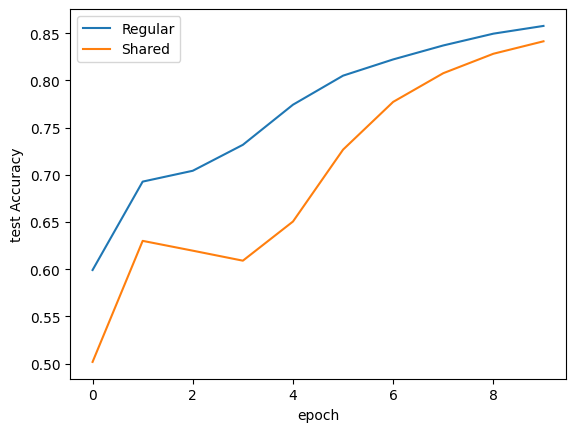

In [9]:
sns.lineplot(data=regular_results, x="epoch", y="test Accuracy", label="Regular")
sns.lineplot(data=shared_results, x="epoch", y="test Accuracy", label="Shared")